<a id='top'></a>

# CSCI 3022: Intro to Data Science - Fall 2019 Practicum 1
***

This practicum is due on Canvas by **11:59 PM on Friday October 11**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**:  

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |[Bottom](#bot)

---

In [ ]:
from scipy import stats
from random import randint
import random
from scipy.special import binom
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

### [30 points] Problem 1: Rubber Ducky Race

Every year, the Aspen Valley Rotary Club hosts a [rubber ducky race](https://www.aspenrotary.org/page/the-ducky-derby). Each Rubber Ducky is stamped with a number, tickets are sold  and if your ducky makes it to the end of the course first, you win. Exact Rules follow:

1. The Rotary Club sells "Duck Adoption" papers. Only Ducks that have been adopted start the race, so there must always be a winner.
2. The ducks are dumped into a river and race to a finish line. The adoptive parent of the first duck across the line wins. The standard prize is 15,000 dollars.
3. Before the start of the duck race, the Rotary Club randomly draws a number of special ducks. For every 3,333 ducks that start the race, 1 special duck is drawn.
4. If a special duck wins the race the prize is increased from 15,000 dollars to 1,000,000 dollars.

**Assume that all ducks are equally likely to win the ducky race.**

**Part A:**
Given that 9999 ducks start the race and you purchase 1 duck, calculate the probability by hand that your duck is selected as a special ducky.

Let X be the event that our duck is chosen. P(X) happening in the first round of picking a special duck is 1/9999, P(X) happening after one epcial duck is chosen is then 1/9998, and P(X) happing in the third round is consequently 1/9997. Therefore P(X) total is $\frac{1}{9999} + \frac{1}{9998} + \frac{1}{9997}$ = 0.00030006 = $3.0006*10^{-4}$

**Part B:** Calculate the probability that the rotary club pays out the million dollar prize.

Given there are 3 special ducks in the race and 9999 ducks total, and the prize goes up to a million dollars if a special duck wins the race, the probability of the club having to pay out a million dollars is $\frac{1}{3333} = 3.0003*10^{-4}$.

**Part C:** Calculate the probability that your duck is both picked as a special duck and wins the race.

Given the calculation we did in Part A, the proability of our duck getting chosen to be a special duck is 0.00030006, and the probability of our duck crossing the finish line first out of 9999 ducks total is 1/9999, the probability of both of these events occuring is $(1.0001*10^{-4})*(3.0006*10^{-4}) = 3.0009 * 10^{-8}$

**Part D:** Calculate the expected payout for the Rotary Club for a 9999 duck race. 

The probability that a special duck wins the race for a prize of 1,000,000 is 3/9999, while the probability that a regular duck wins the race for a price of 15,000 is 9996/9999. Therefore the expected payout is $E[x]=(\frac{3}{9999})1000000 + (\frac{9996}{9999})15000 = 15,295.53$

**Part E:** The Rotary Club takes out an insurance policy on having to pay the 1,000,000 dollar prize. They pay $500 per duck race to the insurance company. From your answer above, is this worth it? Explain. Is there any number of ducks that make the insurance policy a good deal? If it is not worth it, what's a reason the the Rotary Club might buy the policy anyways? 

For the insurance policy to be exactly worth it, the Rotary Club would be paying ($E[x] = 15,295.53$ dollars) - 15,000 dollars = 295.53 dollars. Since the payment they're currently making is more than that, I would say the insurance policy is better than nothing, but not worth it. We can test its worth for a racewith the maximum amount of ducks that will only allow one special duck to be drawn $\newline$
$E[x]=(\frac{1}{6665})1000000 + (\frac{6664}{6665})15000 = 15,147.79$. 147.79 < 295.53, which means the expected payout only decreases as the number of ducks increases before another special duck is drawn. Therefore there is no number of ducks that will make the policy worth it. The reason they are buying it is so they still have some means of paying the million dollars if a special duck is ever drawn. Its much more managable to spend a lot of money over a long period of time than it is to pay it upfront.

**Part F:** Write a python function that simulates a single duck race. It should use the api below and the class written for you. DO NOT CHANGE THE API OR THE ENUMERATED CLASS. The function should take the number of ducks that start the race in as a parameter, and return a tuple of the duck's number that won, and the type of winner that duck was. 

[E.g. (1522, <Types_Of_Winner.REGULAR: 0>) ] 

The duck numbers start at 1 and go until the number passed in (Eg. For 500 ducks, the ducks are numbered 1 to 500. No Duck is numbered 0).

In [251]:
from enum import Enum
#Dont change this. You should return a tuple of (int, Type_Of_Winner) in the function below. 
#The type of winner should be from this class. The int should represent the duck number of the winning duck.
#If you want more info about Enumerated Types in python: https://docs.python.org/3/library/enum.html
class Types_Of_Winner(Enum):
    REGULAR = 0
    SPECIAL = 1

#don't change this api. We will use a set of unit tests to test this. 
#This uses a default parameter. If you are unfamiliar with default parameters: 
#https://www.geeksforgeeks.org/default-arguments-in-python/ 
#Don't change the default parameter.
def rubber_Ducky_Race(number_Of_Ducks=3333):
    #YOUR IMPLEMENTATION HERE
    #Change the below to simulate a duck race.
    #Initiate list of ducks by number
    ducks = [i for i in range(1,number_Of_Ducks+1)]
    #Figure out how many special ducks will be drawn
    numSpecial = int(number_Of_Ducks / 3333)
    #Draw special ducks
    specialDucks = np.random.choice(np.array(ducks), replace=False, size=numSpecial)
    #Choose winner
    winning_Duck_Number = random.randint(1, number_Of_Ducks+1)
    
    #Is the winner a special duck?
    if winning_Duck_Number in specialDucks:
        type_Of_Winner = Types_Of_Winner.SPECIAL
    else:
        type_Of_Winner = Types_Of_Winner.REGULAR
    #print(type_Of_Winner)
    #you can change the variable names, but must return tuple of type (int, Types_Of_Winner)
    return (winning_Duck_Number, type_Of_Winner)

**Part G:** Write a python function that takes in a number of duck races (num_Duck_Races) and a number of ducks per race (num_Ducks_Per_Race). The function should run the function you wrote in part F by passing the number of ducks to the function from part F. It should run the function from part F num_Duck_Races times, and record all the results. It then should calculate the amount of money the rotary club paid out in each race and return a list of the rotary club's payouts (integer values of dollars paid out). Don't change the API as we will be auto grading this.

In [255]:
#Don't change this api. Use the parameters passed in in your implemenation of this function.
def run_Simulation_Duck_Race(num_Duck_Races, num_Ducks_Per_Race):
    #IMPLEMENTATION HERE
    payouts = list()
    for i in range(num_Duck_Races):
        duck_number, type_winner = rubber_Ducky_Race(number_Of_Ducks=num_Ducks_Per_Race)
        if type_winner == Types_Of_Winner.SPECIAL:
            payouts.append(1000000)
        elif type_winner == Types_Of_Winner.REGULAR:
            payouts.append(15000)
    #CHANGE RETURN VALUE TO BE LIST OF PAYOUTS FROM YOUR CODE IMPLEMENTED IN THIS FUNCTION
    return payouts

**Part H:** Run the simulation function you made in part G 50 times for 1111 duck races each with 3333 ducks per race. Calculate the mean of each list of payouts returned by your function from part F and plot the mean payout values on a histogram. We recommend using the default bins argument here (don't pass it in). Make sure to make your histogram legible, label the plot, and label the x and the y axes (with their units). Do this all in one cell and run the cell a few times and see what different histograms are generated from the simulations. When you find one with three distinct "bars" leave it in the output of the cell. Explain why this histogram makes sense. Your answer here should talk about what each distinct "bar" in the histogram represents, the probabiity that the rotary club pays out the million dollar prize, and the number of races in each simulation. 

[15000.0, 15000.0, 15000.0, 15000.0, 15000.0, 15886.58, 15000.0, 15000.0, 15000.0, 15000.0, 15000.0, 15000.0, 15000.0, 15000.0, 15000.0, 15000.0, 15000.0, 15886.58, 15000.0, 16773.17, 15000.0, 15000.0, 15000.0, 15000.0, 15886.58, 15000.0, 15000.0, 15000.0, 15000.0, 15000.0, 15000.0, 15886.58, 15000.0, 15000.0, 15000.0, 15886.58, 15000.0, 15000.0, 15000.0, 15000.0, 15886.58, 15000.0, 15000.0, 15000.0, 15000.0, 15000.0, 15000.0, 15000.0, 15000.0, 15886.58]


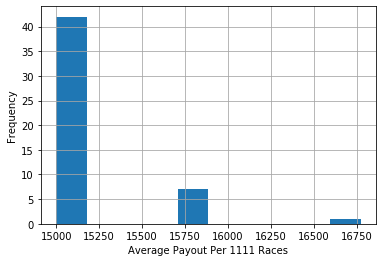

In [266]:
a = []
for i in range(50):
    payouts = run_Simulation_Duck_Race(1111, 3333)
    avg = np.mean(payouts)
    avg = int(avg*100)/100.0
    a.append(avg)
print(a)
plt.hist(a)
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.xlabel("Average Payout Per 1111 Races")
plt.ylabel('Frequency')
plt.show(a)

The histogram I generated above has 3 distinct bar value - 15000 at a frequency of 42, 15886.58 at a frequency of 7, and 16773.17 at a frequency of 1. The probability that the rotary club pays out the millions dollar prize for 3333 duck race as we calculated above is $\frac{1}{3333}=3.0003*10^{-4}$. Averages of 15000 on the histogram represent instances of the rotary club paying out the million dollar prize not once out of 1111 races. Likewise, averages of 15886.58 on the histogram represent instances of the rotary club paying out the million dollar prize once out of 1111 races, and averages of 16773.17 reprsent instances of the rotary club having to pay out the million dollar price twice out of 1111 races. So according to the histogram, the number of times the rotaryb club paid out the million dollar prize is 42(0) + 7(1) + 1(2) = 9, and there are $1111*50=55550$ races in total, so the apparent probability of the rotary club having to pay out the million dollar prize based off the histogram is $\frac{9}{55550}=1.6201*10^{-4}$, which is relatively close (also on the lower end of all the times I ran this code) to $3.0003*10^{-4}$, the probability for that vent that we calculated earlier.

**Part I:** Pick a lucky number in between 1 and 7000 and run your function from part F 25000 times with 7,000 ducks. Capture all the results and find the number of times your duck won! Was your duck ever a winner or even a special Million Dollar Winner?

In [267]:
lucky_number = 1998
regWins = 0
specialWins = 0
for i in range(25000):
    duck_number, type_winner = rubber_Ducky_Race(number_Of_Ducks=7000)
    if duck_number==1998 and type_winner == Types_Of_Winner.SPECIAL:
        specWins+=1
    elif duck_number==1998 and  type_winner == Types_Of_Winner.REGULAR:
        regWins+=1
print("Your regular duck, duck number {}, ".format(lucky_number) + " won {} times".format(regWins))
print("Your special duck, duck number {}, ".format(lucky_number) + " won {} times".format(specialWins))

Your regular duck, duck number 1998,  won 3 times
Your special duck, duck number 1998,  won 0 times


I ran this test a few times and never once was a winner with a special duck. This is accurate considering the probability of getting my duck chosen as a special duck out of 7000 is $\frac{1}{7000}+\frac{1}{6999} = 0.000285735$, and the probability of a special duck winning out of 7000 total ducks is $\frac{2}{7000}=0.000285714$, which means the probability of both those events occuring is $0.000285735 * 0.000285714 = 8.164 * 10^{-8}$

<br>

---
[Back to top](#top)
<a id='p2'></a>

### [20 points] Problem 2: Tax Fraud

Let $X =$ the leading digit of a randomly selected number from a large accounting ledger. So, for example, if we randomly draw the number $\$20,695$, then $X = 2$. People who make up numbers to commit accounting fraud tend to give $X$ a (discrete) uniform distribution, i.e., $P(X = x) = 1/9$, for $x \in \{1,...,9\}$. However, there is empirical evidence that suggests that "naturally occurring" numbers (e.g., numbers in a non-fraudulent accounting ledger) have leading digits that do not follow a uniform distribution. Instead, they follow a distribution defined by:

\begin{align*}
f(x) = \log_{10}\bigg(\frac{x+1}{x}\bigg), \,\,\,\, x = 1,2,...,9.
\end{align*} 

Using ${\tt tax.txt}$, a dataset containing the taxable incomes for individuals in 1978, we will decide whether this dataset is fraudulent. 



**Part A**:  Read in the data and create a variable that holds only the character of each data point.

In [362]:
import re

leadingDigs = list()
with open('tax.txt', 'r') as tax_file:
    #skip first row
    line = tax_file.readline()
    while line:
        line = tax_file.readline()
        #using regex to run through file
        match = re.search('\t\d', line)
        if match:
            #digit takes in only the leading digit of each value
            digit = match.group(0)
            leadingDigs.append(int(digit))  

**Part B**: Create a histogram of the data that also plots or overlays the suggested non-fradulent density $f(x)$ as well as the density of the discrete uniform over the same support.

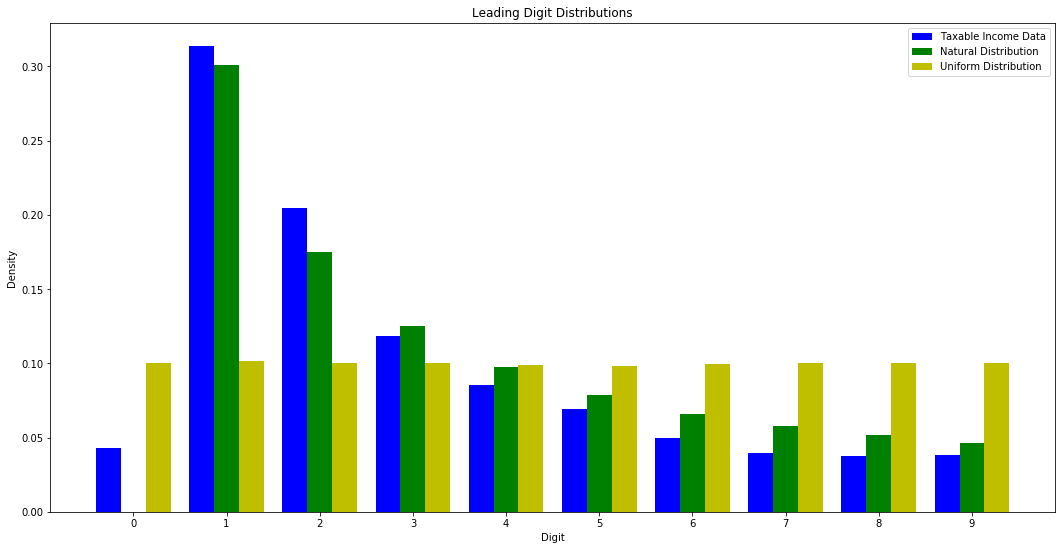

In [361]:
import math
d = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

sample_size = len(digit_list)

data_points = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

probabilities = [math.log10((x+1)/x) if x > 0 else 0 for x in data_points ]

natural_dist_list = np.random.choice(data_points, p=probabilities, size=sample_size)

uniform_list = np.random.uniform(0,10,sample_size)

plot = plt.figure(figsize=(18,9))
ax = plt.subplot()
ax.hist([digit_list, natural_dist_list, uniform_list], range=[0,10], 
             color=['b', 'g', 'y'], label=['Taxable Income Data', 'Natural Distribution', 'Uniform Distribution'], density=True)
plt.xticks([x+0.5 for x in range(10)], range(10))

ax.set_title('Leading Digit Distributions')
ax.set_xlabel('Digit')
ax.set_ylabel('Density')

plt.legend()

**Part C**: Does it appear as those the data is fraudulent, not fraudulent, or too hard to tell?  What kind of numerical measures could you use to support such a conclusion?

According to the histogram, the data from the the set of taxable incomes does not appear to be fraudulent. Each data point for "Actual Data" is too similar to the data points for "Natural Distribution", while the uniform distribution falls far below. A way to make this conclusion based off numbers would be to take the averages for the leading digits of the 'Taxable Income Data', 'Natural Distribution' and 'Uniform Distribution', in order to see that the averages for the first two are much lower than the average of the uniform distribution, as there are more occurences of leading digit 1.

**Part D**: Create a new object that stores only the first digit of the first 100 distinct powers of 2, e.g. $Y=[2, 2^2, 2^3, 2^4, \dots ]$.  Repeat steps a) and b) for this new data set, plotting the distribution of the first digit of terms in $Y$ against $f(x)$.

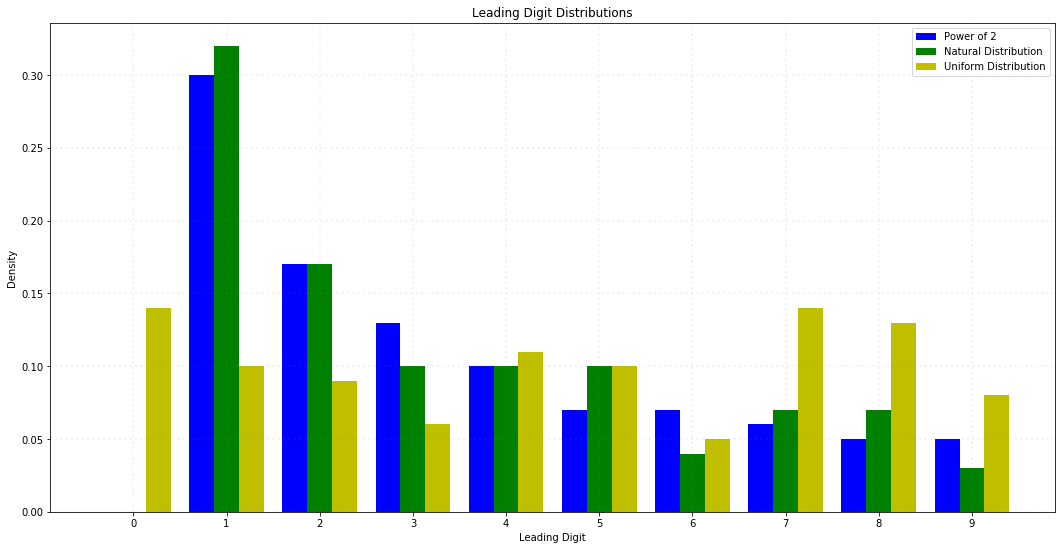

In [280]:
actual = [int(str(2**i)[0]) for i in range(1, 101)]
uniform = np.random.uniform(0,10,len(actual))
natural = np.random.choice(data_points, p=probabilities, size=len(actual))

plt.figure(figsize=(18,9))
ax = plt.subplot()

ax.hist([actual, natural, uniform], range=[0,10], color=['b', 'g', 'y'], label=['Power of 2', 'Natural Distribution', 'Uniform Distribution'], density=True)

plt.xticks([x+0.5 for x in range(10)], range(10))

ax.set_title('Leading Digit Distributions')
ax.set_xlabel('Leading Digit')
ax.set_ylabel('Density')

ax.grid(color='grey', linestyle=':', linewidth=2, alpha=0.1)

plt.legend()

<br>

---
[Back to top](#top)
<a id='p3'></a>

### [30 points] Problem 3: Poker

It's time to play poker.  (https://en.wikipedia.org/wiki/Texas_hold_%27em#Hand_values) Assume that we are using a standard deck of cards without jokers (52 cards). For each round, you will be dealt 5 cards from the deck without replacement. There are several different types of hands that can be dealt; listed below are a few of interest: 

- Highcard (Simple value of the card. Lowest: 2 - Highest: Ace)
- Pair (Two cards with the same value)
- Two pair (Twice two cards with the same value)
- Three of a kind (Three cards with the same value)
- Straight (Sequence of 5 cards in increasing value, Ace can only follow K)
- Four of a kind (Four cards with the same value)
- Full house (Three of a kind and a pair)
- Flush (5 cards of the same suit)

**Part A**: What is the exact probability you get at least a Pair in your 5 cards? What is the probability of getting a Full House?  (Note that we're including pairs as a subset of a full house, here)

So, there are 52 cards total so the total number of 5 cards combinations can be calculated as $\frac{52!}{47!5!} = 2598960$. 

To find the probability of selecting 5 cards with at least one pair, we must find the probability of getting one pair and union it with the probability of getting two pairs. The number of different one pair combos you can get is $13\choose{1}$$4\choose{2}$$12\choose{3}$$4\choose{1}$$4\choose{1}$ $4\choose{1}$ = 13·6·220·4·4·4 = 1,098,240, and the total number of hands you can choose with 2 pairs is $13\choose{2}$$4\choose{2}$$4\choose{2}$$11\choose{1}$$4\choose{1}$ =  78·6·6·11·4 = 123,552. So the total number of hands that either has one or two pairs is 123,552 + 1,098,240 = 1,221,792, which means the probability of either of these events occuring is $\frac{1,221,792}{2598960} = 0.4701$. 

The probability of getting a fullhouse is the probability of choosing 3 of the same number and 2 of the same number, which is calculated as $13\choose{1}$$4\choose{2}$$12\choose{1}$$4\choose{3}$ = 13·4·12·6 = 3744, meaning the probability of this event occuring is $\frac{3744}{2598960} = 1.441*10^{-3}$.

**Part B**: Write a function `getCards()` to randomly generate 5 cards from the no-joker deck. This function should return an array of 5 cards.

In [353]:
class Card:
    def __init__(self, value, suit):
        self.value = value
        self.suit = suit

    def get_value(self):
        return self.value

class Deck:
    def __init__(self):
        self.cards = list()
        self.build()
        self.size = 52

    def build(self):
        # suits
        for suit in ['Diamonds', 'Hearts', 'Spades', 'Clubs']:
            # values
            for val in ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']:
                self.cards.append(Card(value, suit))
                
    def shuffle(self):
        #This shuffling method iterates through the 52 cards and swaps each with a random card
        for i in range(51, 0, -1):
            x = random.randint(0, i)
            self.cards[i], self.cards[x] = self.cards[x], self.cards[i]
    
    def draw_card(self):
        return self.cards.pop()

def getCards():
    deck = Deck()
    deck.shuffle()
    l = list()
    for i in range(5):
        l.append(deck.draw_card())
    return l



**Part C**: Run the `getCards()` simulation 10000 times, and store the result in an array named `card_array`.

In [354]:
card_array = [getCards() for i in range(10000)]

**Part D**: Write a function `pair(card_array, num_sim)` For the 10000 simulations we did in Part C, what is the probability of have Pair? Does the result agree with your calculation in Part A?

In [358]:
#helper function to return list of current cards
def getValues(hand):
    l = list()
    for card in hand:
        l.append(card.value)
    return l

def pair(hands, num_trials):
    num_success = 0
    for hand in hands:
        gto=False
        values = getValues(hand)
        d = {i: values.count(i) for i in values}
        for key, value in d.items():
            if value > 1: 
                gto=True
        if gto:
            num_success += 1
    return num_success/num_trials

print("The probability of getting a 5 card hand with at least a pair is ",pair(card_array, 10000),"which is relatively close to the answer we got in part A, 0.4701")

The probability of getting a 5 card hand with at least a pair is  0.4918 which is relatively close to the answer we got in part A, 0.4701


**Part E:** Write a function `fullhouse(card_array, num_sim)` For the 10000 simulations we did in Part C, what is the probability of having a Full House? Does the result agree with your calculation in Part A?

In [359]:
def fullhouse(hands, num_trials):
    num_success = 0
    for hand in hands:
        values = getValues(hand)
        d = {i: values.count(i) for i in values}
        pair = False
        triple = False
        for key, value in d.items():
            if value == 2:
                pair = True
            if value == 3:
                triple = True
        if pair & triple:
            num_success += 1
    return num_success/num_trials

print("The probability of choosing a 5 card hand that is a fullhouse is ",fullhouse(card_array, 10000),"which is relatively close to the answer we got in part A, 0.00144")

The probability of choosing a 5 card hand that is a fullhouse is  0.0015 which is relatively close to the answer we got in part A, 0.00144
